<center><img src="Fig/Ensimag.png" width="30%" height="30%"></center>
<center><h3>Ensimag 2A</h3></center>
<hr>
<center><h1>Optimisation Numérique</h1></center>
<center><h2>TP3: Proximal Algorithms (2x1.5h)</h2></center>

# Structure of an optimization program

An optimization program can be practically divided into three parts:
* the *run* environment, in which you test, run your program, and display results.
* the *problem* part, which contains the function oracles, problem constraints, etc.
* the *algorithmic* part, where the algorithms are coded.

The main interest of such division is that these parts are interchangeable, meaning that, for instance, the algorithms of the third part can be used of a variety of problems. That is why such a decomposition is widely used.

In the present lab, you will use this division:
* `TP3_Proximal_algorithms.ipynb` will be the *run* environment
* `logistic_regression.ipynb` will be the considered *logistic regression problem* for this lab
* `algoProx.ipynb` will contain the proximal *algorithms* studied in this lab

---

The following script will allow you to import *notebooks* as if you imported *python files* and will have to be executed at each time you launch Jupyter notebooks.

In [1]:
import start
from imp import reload

/tmp/ipykernel_6682/105395898.py:2: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


---

# Composite minimization for machine learning.

In this lab, we will investigate optimization algorithms over composite functions composed of a smooth and a non-smooth part using the proximal gradient algorithm over a practical problem of machine learning: binary classification using logistic regression.</br>

> Read the file `logistic_regression_2.ipynb` containing the problem explanation and simulators. 

> Implement the proximal operation linked to $\ell_1$ norm in the regularization. 

> Implement the proximal gradient algorithm in the file `algoProx.ipynb` and test you algorithm below.


In [2]:
import algoProx             # load our algoProx module (from notebook)
reload(algoProx)            # reload the module if changed (and saved)
from algoProx import *      # import all methods of the module into the current environment

import numpy as np
import logistic_regression_2 as pb
reload(pb)

#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 1e-5                     # Sought precision
ITE_MAX = 1000                      # Max number of iterations
x0      = np.zeros(pb.n)              # Initial point
step    = 1.0/pb.L

##### gradient algorithm
x,x_tab = proximal_gradient_algorithm(pb.F , pb.f_grad , pb.g_prox , x0 , step , PREC, ITE_MAX , True)



importing notebook from algoProx.ipynb
importing notebook from algoProx.ipynb
importing notebook from logistic_regression_2.ipynb
importing notebook from logistic_regression_2.ipynb
------------------------------------
 Proximal gradient algorithm
------------------------------------
START    -- stepsize = 0.030334772813507393
FINISHED -- 999 iterations / 1.770761s -- final value: 0.438712




> Investigate the decrease of the algorithm.

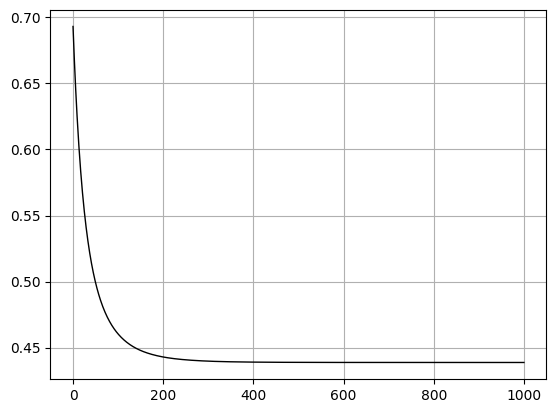

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

F = []
for i in range(x_tab.shape[0]):
    F.append(pb.F(x_tab[i])) 

plt.figure()
plt.plot(F, color="black", linewidth=1.0, linestyle="-")
plt.grid(True)
plt.show()

> Plot, with the following command, the support of the vector $x_k$ (i.e. one point for every non-null coordinate of $x_k$) versus the iterations. 

> What do yo notice? Was it expected?

In [10]:
# test de x_tab : 

print(x_tab)

[[ 1.55482249e-02 -1.66377962e-01  2.07842434e-02 -2.86586107e-01
  -1.28870883e-01  1.90477988e-01  4.74869973e-02  2.35671958e-02
  -3.28429508e-02 -5.28412610e-02  1.44824086e-01 -6.08299450e-02
   3.93775375e-01  2.36222829e-01  3.69937765e-01  3.43991090e-02
  -4.96046600e-02 -3.77266014e-01 -1.31665105e-02 -1.47272829e-01
  -2.40276100e-01  4.39607042e-01 -2.75479946e-01 -9.56926620e-02
  -2.99694863e-01  1.64279405e+00  2.59163614e+00 -6.66431442e-01]
 [ 3.68912630e-02 -1.29226663e-01 -9.43245050e-03 -2.25577857e-01
  -1.13331967e-01  1.43892285e-01  5.33515095e-02  3.28604054e-03
  -4.08138569e-02 -7.94001681e-02  1.59078060e-01 -4.03229648e-02
   3.03591379e-01  1.84484270e-01  2.63612090e-01 -1.40156702e-02
  -1.71878850e-02 -2.86810176e-01 -4.72353159e-03 -1.05273127e-01
  -1.89540561e-01  3.26745964e-01 -2.13785827e-01 -7.00246951e-02
  -2.61731487e-01  1.41493404e+00  2.02372495e+00 -5.41556304e-01]
 [ 5.72320161e-02 -9.47282228e-02 -2.97804958e-02 -1.72309269e-01
  -9.038

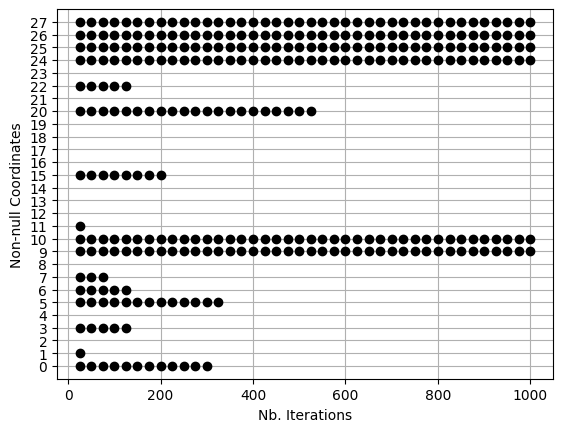

In [5]:
plt.figure()

for i in np.arange(0,x_tab.shape[0],int(x_tab.shape[0]/40)):
    for j in range(pb.n):
        if np.abs(x_tab[i,j])>1e-14:
            plt.plot( i , j  , 'ko')

plt.grid(True)
plt.ylabel('Non-null Coordinates')
plt.xlabel('Nb. Iterations')
plt.ylim(-1,pb.d+1)
plt.yticks(np.arange(0,pb.d+1))
plt.show()

---

# Regularization path.


We saw above that the algorithm *selected* some coordinates as the other get to zero. Considering our machine learning task (see `logistic_regression_2.ipynb`), this translates into the algorithm selecting a subset of the features that will be used for the prediction step.  

> Change the parameter $\lambda_1$ of the problem (`pb.lam1`) in the code above and investigate how it influences the number of selected features.

In order to quantify the influence of this feature selection, let us consider the *regularization path* that is the support of the final points obtained by our minimization method versus the value of $\lambda_1$.

> For $\lambda_1 = 2^{-12},2^{-11}, .. , 2^{1}$, run the proximal gradient algorithm on the obtained problem and store the support of the final point, the prediction performance on the *training set* (`pb.prediction_train`) and on the *testing set* (`pb.prediction_test`).

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

import algoProx             # load our algoProx module (from notebook)
reload(algoProx)            # reload the module if changed (and saved)
from algoProx import *      # import all methods of the module into the current environment

import numpy as np
import logistic_regression_2 as pb
reload(pb)

#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 1e-5                     # Sought precision
ITE_MAX = 500                      # Max number of iterations
x0      = np.zeros(pb.n)              # Initial point
step    = 1.0/pb.L

# FILL THERE #######
reg_l1_tab = [2**(-i) for i in range(12 , -2 , -1)]
pb.lam2 = 1e-1

train_perf = np.zeros(len(reg_l1_tab))
test_perf = np.zeros_like(train_perf)
x_tab = np.zeros((len(reg_l1_tab), pb.n))
x_tab_lst = []
for i, lam1 in enumerate(reg_l1_tab):
    pb.lam1 = lam1
    # FILL HERE #########
    x_lam1,x_tab_lam1 = proximal_gradient_algorithm(pb.F , pb.f_grad , pb.g_prox , x0 , step , PREC, ITE_MAX , False)
    x_tab[i] = x_lam1
    x_tab_lst.append(x_tab_lam1)
    _ , train_perf[i] = pb.prediction_train(x_lam1 , False)
    _ , test_perf[i] = pb.prediction_test(x_lam1 , False)

    # ###################

print(train_perf)
print(test_perf)



importing notebook from algoProx.ipynb
importing notebook from logistic_regression_2.ipynb
[0.92333333 0.92333333 0.92333333 0.92       0.92       0.92
 0.91666667 0.91333333 0.90666667 0.91       0.91       0.58
 0.58       0.58      ]
[0.86315789 0.86315789 0.86315789 0.86315789 0.88421053 0.89473684
 0.89473684 0.84210526 0.82105263 0.82105263 0.82105263 0.62105263
 0.62105263 0.62105263]


> Plot the *regularization path* and look at the feature signification (file `student.txt` or `logistic_regression_2.ipynb`) to see which are the most important features of the dataset.

> (Bonus: you can do some text manipulation to put the labels on the plot as well).

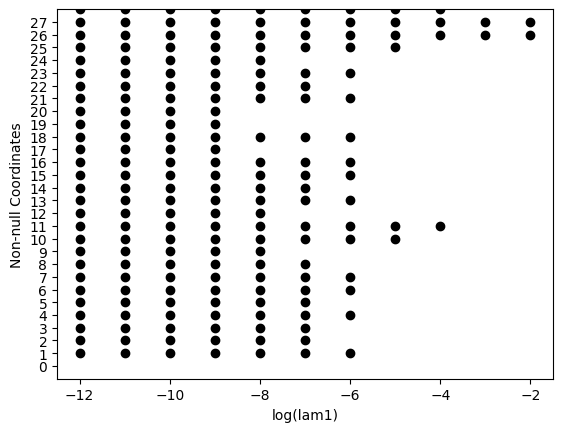

In [7]:
plt.figure()
for i, feat in enumerate(x_tab.T):
    nonzeros = np.flatnonzero(feat)
    plt.scatter(nonzeros - 12, (i+1)*np.ones_like(nonzeros), color='k', marker='o')

plt.ylabel('Non-null Coordinates')

plt.ylim(-1,pb.d+1)
plt.yticks(np.arange(0,pb.d+1))
plt.xlabel("log(lam1)")
plt.show()

> Plot the *training* and *testing* accuracies versus the value of $\lambda_1$.

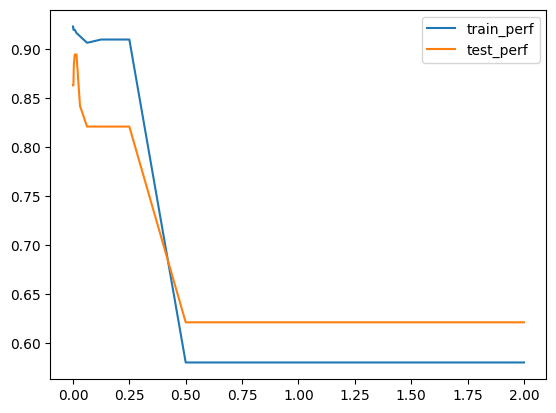

In [8]:
log_lam = np.arange(-11, 2)
# FILL HERE ####
plt.plot(reg_l1_tab , train_perf , label="train_perf" )
plt.plot(reg_l1_tab , test_perf , label ="test_perf")
plt.legend()
# ##############
plt.legend()
plt.show()

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

import algoProx             # load our algoProx module (from notebook)
reload(algoProx)            # reload the module if changed (and saved)
from algoProx import *      # import all methods of the module into the current environment

import numpy as np
import logistic_regression_2 as pb
reload(pb)

#### Parameter we give at our algorithm (see algoGradient.ipynb)
PREC    = 1e-3                     # Sought precision
ITE_MAX = 5000                     # Max number of iterations
x0      = np.zeros(pb.n)              # Initial point
step    = 1.0/pb.L

log_lam = np.arange(-7, 3)
reg_l2_tab = np.power( 2.0, log_lam )
pb.lam1 = 1e-5

train_perf = np.zeros(len(reg_l2_tab))
test_perf = np.zeros_like(train_perf)
x_tab = np.zeros((len(reg_l2_tab), pb.n))
x_tab_lst = []

for i, lam2 in enumerate(reg_l2_tab):
    pb.lam2 = lam2
    x, x_tab_alg = proximal_gradient_algorithm(pb.F , pb.f_grad , pb.g_prox , x0 , step , PREC, ITE_MAX, True)
    x_tab[i] = x
    x_tab_lst.append(x_tab_alg)
    _, train_perf[i] = pb.prediction_train(x, False)
    _, test_perf[i] = pb.prediction_test(x, False)
    x

importing notebook from algoProx.ipynb
importing notebook from logistic_regression_2.ipynb
------------------------------------
 Proximal gradient algorithm
------------------------------------
START    -- stepsize = 0.030334772813507393
FINISHED -- 4999 iterations / 11.110613s -- final value: 0.194479


------------------------------------
 Proximal gradient algorithm
------------------------------------
START    -- stepsize = 0.030334772813507393
FINISHED -- 4373 iterations / 10.736816s -- final value: 0.229104


------------------------------------
 Proximal gradient algorithm
------------------------------------
START    -- stepsize = 0.030334772813507393
FINISHED -- 2492 iterations / 4.306497s -- final value: 0.271879


------------------------------------
 Proximal gradient algorithm
------------------------------------
START    -- stepsize = 0.030334772813507393
FINISHED -- 1417 iterations / 3.526878s -- final value: 0.323153


------------------------------------
 Proximal grad

KeyboardInterrupt: 

> Explore the proximal algorithm or propose ideas (cite your sources if you use pieces of litterature) to change it or compare it to something else. Send the results to your favorite TA by zipping/tarballing/... your work and either:
> * sending it directly via an email.
> * sending and email with an invitation to a PRIVATE repository (github, gitlab, bitbucket, etc) containing your work.
>
> ### Guidelines:
> Write your own code, do not try to throw LLM nonsense to your TA.
> 
> Be original.
> 
> Write every idea you have in the notebook, as verbosely as possible.
>
> Write clean code. E.g. go see python's pep8.